In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [ ]:
dataset1 = pd.read_csv('file.csv')
X = dataset1[['Input']].values
y = dataset1[['Output']].values



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [ ]:
# Name:HARISHA S
# Register Number:212223040063
class NeuralNet(nn.Module):
  def __init__(self):
        super().__init__()
        self.fc1=nn.Linear(1,10)
        self.fc2=nn.Linear(10,12)
        self.fc3=nn.Linear(12,1)
        self.relu=nn.ReLU()
        self.history={'loss': []}

  def forward(self, x):
    x=self.relu(self.fc1(x))
    x=self.relu(self.fc2(x))
    x=self.fc3(x)
    return x


In [ ]:
ai_brain=NeuralNet()
criterion=nn.MSELoss()
optimizer=optim.RMSprop(ai_brain.parameters(),lr=0.001)

In [ ]:
# Name:Harisha S
# Register Number:212223040063
def train_model(ai_brain, X_train, y_train, criterion, optimizer, epochs=2000):
  for epoch in range(epochs):
        optimizer.zero_grad()
        loss = criterion(ai_brain(X_train), y_train)
        loss.backward()
        optimizer.step()

        ai_brain.history['loss'].append(loss.item())
        if epoch % 200 == 0:
            print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.6f}')

In [ ]:
train_model(ai_brain, X_train_tensor, y_train_tensor, criterion, optimizer)


Epoch [0/2000], Loss: 2160.632812
Epoch [200/2000], Loss: 1422.901855
Epoch [400/2000], Loss: 550.185242
Epoch [600/2000], Loss: 208.537415
Epoch [800/2000], Loss: 151.109650
Epoch [1000/2000], Loss: 85.564644
Epoch [1200/2000], Loss: 30.623413
Epoch [1400/2000], Loss: 4.503707
Epoch [1600/2000], Loss: 0.300139
Epoch [1800/2000], Loss: 0.012713


In [ ]:
with torch.no_grad():
    test_loss = criterion(ai_brain(X_test_tensor), y_test_tensor)
    print(f'Test Loss: {test_loss.item():.6f}')

Test Loss: 1.010898


In [ ]:
loss_df = pd.DataFrame(ai_brain.history)

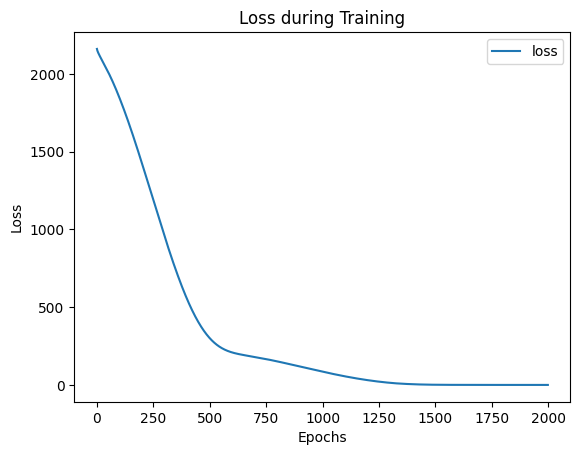

In [ ]:
import matplotlib.pyplot as plt
loss_df.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.show()

In [ ]:
X_n1_1 = torch.tensor([[8]], dtype=torch.float32)
prediction = ai_brain(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction: {prediction}')

Prediction: 33.039649963378906
